# **Tugas 7 - Diabetic Retinophaty**

In [2]:
%cd /content/drive/MyDrive/KULIAH/SEMESTER 5/DATA MINING/datamining

/content/drive/MyDrive/KULIAH/SEMESTER 5/DATA MINING/datamining


In [3]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from scipy.io import arff
import pandas as pd

data = arff.loadarff('messidor_features.arff')
df = pd.DataFrame(data[0])

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Class
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,b'0'
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,b'0'
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,b'1'
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,b'0'
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,b'1'


In [5]:
#read the data from csv file
col_names = []
for i in range(20):
    if i == 0:
        col_names.append('quality')
    if i == 1:
        col_names.append('prescreen')
    if i >= 2 and i <= 7:
        col_names.append('ma' + str(i))
    if i >= 8 and i <= 15:
        col_names.append('exudate' + str(i))
    if i == 16:
        col_names.append('euDist')
    if i == 17:
        col_names.append('diameter')
    if i == 18:
        col_names.append('amfm_class')
    if i == 19:
        col_names.append('label')
    
data = arff.loadarff('messidor_features.arff')
df = pd.DataFrame(data[0])

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Class
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,b'0'
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,b'0'
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,b'1'
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,b'0'
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,b'1'


In [6]:
df.columns = [col_names]
df

,quality,prescreen,ma2,ma3,ma4,ma5,ma6,ma7,exudate8,exudate9,exudate10,exudate11,exudate12,exudate13,exudate14,exudate15,euDist,diameter,amfm_class,label
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,b'0'
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,b'0'
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,b'1'
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,b'0'
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1.0,1.0,34.0,34.0,34.0,33.0,31.0,24.0,6.071765,0.937472,0.031145,0.003115,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0.0,b'0'
1147,1.0,1.0,49.0,49.0,49.0,49.0,45.0,37.0,63.197145,27.377668,8.067688,0.979548,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0.0,b'0'
1148,1.0,0.0,49.0,48.0,48.0,45.0,43.0,33.0,30.461898,13.966980,1.763305,0.137858,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0.0,b'0'
1149,1.0,1.0,39.0,36.0,29.0,23.0,13.0,7.0,40.525739,12.604947,4.740919,1.077570,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1.0,b'1'


In [7]:
X = df.drop(columns=['label'])
X

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,quality,prescreen,ma2,ma3,ma4,ma5,ma6,ma7,exudate8,exudate9,exudate10,exudate11,exudate12,exudate13,exudate14,exudate15,euDist,diameter,amfm_class
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1.0,1.0,34.0,34.0,34.0,33.0,31.0,24.0,6.071765,0.937472,0.031145,0.003115,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0.0
1147,1.0,1.0,49.0,49.0,49.0,49.0,45.0,37.0,63.197145,27.377668,8.067688,0.979548,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0.0
1148,1.0,0.0,49.0,48.0,48.0,45.0,43.0,33.0,30.461898,13.966980,1.763305,0.137858,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0.0
1149,1.0,1.0,39.0,36.0,29.0,23.0,13.0,7.0,40.525739,12.604947,4.740919,1.077570,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1.0


## **Normalisasi**
Rumus normalisasi min-max  
$$ x' = \frac{x-x_{min}}{x_{max}-x_{min}}$$


In [8]:
#normalisasi
from sklearn.preprocessing import MinMaxScaler
import joblib

scaler = MinMaxScaler()
# scaler.fit(features)
# scaler.transform(features)
scaled = scaler.fit_transform(X)
features_names = X.columns.copy()
# features_names.remove('label')
scaled_features = pd.DataFrame(scaled, columns=features_names)
scaled_features.head(10)

#save model preprocessing
scaler_filename = "scaled.save"
joblib.dump(scaler, scaler_filename) 
scaler = joblib.load(scaler_filename)

datates = arff.loadarff('messidor_features.arff')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [9]:
scaled_features

,quality,prescreen,ma2,ma3,ma4,ma5,ma6,ma7,exudate8,exudate9,exudate10,exudate11,exudate12,exudate13,exudate14,exudate15,euDist,diameter,amfm_class
0,1.0,1.0,0.140000,0.160305,0.176471,0.173077,0.177083,0.147727,0.122764,0.106359,0.049693,0.012913,0.000362,0.000342,0.000661,0.001271,0.530801,0.261133,1.0
1,1.0,1.0,0.153333,0.175573,0.176471,0.163462,0.156250,0.136364,0.142126,0.142403,0.031351,0.003918,0.000076,0.000194,0.000657,0.001264,0.682302,0.536341,0.0
2,1.0,1.0,0.406667,0.450382,0.487395,0.509615,0.479167,0.363636,0.137472,0.167497,0.119614,0.081188,0.027106,0.018571,0.007043,0.002509,0.726836,0.437973,0.0
3,1.0,1.0,0.360000,0.396947,0.436975,0.471154,0.437500,0.340909,0.099403,0.110368,0.085971,0.051525,0.016340,0.013555,0.001289,0.000496,0.514678,0.352675,0.0
4,1.0,1.0,0.286667,0.328244,0.361345,0.384615,0.395833,0.295455,0.043799,0.051281,0.003869,0.000000,0.000000,0.000000,0.000000,0.000000,0.481936,0.407122,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1.0,1.0,0.220000,0.251908,0.277311,0.307692,0.312500,0.261364,0.014179,0.005609,0.000294,0.000052,0.000000,0.000000,0.000000,0.000000,0.756089,0.365106,0.0
1147,1.0,1.0,0.320000,0.366412,0.403361,0.461538,0.458333,0.409091,0.155722,0.163809,0.076060,0.016390,0.000030,0.000000,0.000000,0.000000,0.663701,0.410954,0.0
1148,1.0,0.0,0.320000,0.358779,0.394958,0.423077,0.437500,0.363636,0.074612,0.083569,0.016624,0.002307,0.000218,0.000000,0.000000,0.000000,0.859281,0.446002,0.0
1149,1.0,1.0,0.253333,0.267176,0.235294,0.211538,0.125000,0.068182,0.099548,0.075419,0.044696,0.018030,0.010958,0.016263,0.040346,0.056559,0.526653,0.302456,1.0


In [10]:
scaled

array([[1.        , 1.        , 0.14      , ..., 0.53080127, 0.26113347,
        1.        ],
       [1.        , 1.        , 0.15333333, ..., 0.68230157, 0.5363407 ,
        0.        ],
       [1.        , 1.        , 0.40666667, ..., 0.72683611, 0.43797313,
        0.        ],
       ...,
       [1.        , 0.        , 0.32      , ..., 0.85928137, 0.446002  ,
        0.        ],
       [1.        , 1.        , 0.25333333, ..., 0.52665345, 0.30245578,
        1.        ],
       [1.        , 1.        , 0.04      , ..., 0.83950012, 0.192513  ,
        0.        ]])

In [11]:
y = df['label'].values 
y[0:5]

array([[b'0'],
       [b'0'],
       [b'1'],
       [b'0'],
       [b'1']], dtype=object)

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder() #untuk merubah label tipe kategori ke numerik scara berurutan
le.fit(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [13]:
ybaru = le.transform(y)
ybaru

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 1, ..., 0, 1, 0])

## **Menggunakan Naive-Bayes Gaussian**

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.preprocessing import LabelEncoder

#Model Select
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#split dataset
training, test = train_test_split(scaled, train_size = 0.8, test_size = 0.2, shuffle=False)
training_label, test_label = train_test_split(ybaru, train_size = 0.8, test_size = 0.2, shuffle=False) 

clf2 = GaussianNB()
clf2.fit(training, training_label)

probas = clf2.predict_proba(test)
probas = probas[:,1]
probas.shape
probas

 

array([0.75620474, 0.11189161, 1.        , 0.10486252, 0.14252695,
       1.        , 0.87186459, 0.08938164, 0.06195771, 0.07016774,
       1.        , 0.07309769, 0.99377827, 0.08398282, 0.99999961,
       0.85347824, 0.91850879, 0.07858852, 0.64476537, 0.21435453,
       0.09334844, 0.9769378 , 0.95011339, 0.68211181, 0.96900188,
       0.99890913, 0.99724613, 0.16434853, 0.86018358, 0.99999363,
       0.53634466, 0.08895374, 0.98313892, 0.29158109, 0.25465845,
       1.        , 0.42762289, 0.88627287, 0.48478246, 0.68057536,
       0.09285228, 0.92485924, 0.12602622, 0.99996256, 0.67208144,
       0.95535994, 0.08212779, 0.92138625, 0.14110054, 0.29346465,
       0.99957587, 0.09783595, 0.07974339, 0.63233074, 0.2814182 ,
       1.        , 0.14248748, 1.        , 1.        , 0.99977481,
       0.94905966, 0.32335402, 0.66732001, 0.98470723, 0.99924866,
       0.91560627, 0.09860317, 0.99956381, 0.13165869, 0.93304628,
       1.        , 0.1097288 , 0.336975  , 0.67880805, 0.07551

In [16]:
probas = probas.round()
probas

array([1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 1.

In [17]:
accuracy_score(test_label, probas)

0.6363636363636364

In [19]:
filemodelGaussian = 'modelGaussian.pkl'
joblib.dump(clf2, filemodelGaussian) #save mode gaussian

['modelGaussian.pkl']

## **menggunakan metode K-NN**

In [20]:
# splitting the data into training and test sets (80:20)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,ybaru,test_size=0.2,random_state=4)

In [21]:
#shape of train and test objects
print(X_train.shape)
print(X_test.shape)

(920, 19)
(231, 19)


In [22]:
#import the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

In [23]:
scores

{1: 0.6536796536796536,
 2: 0.6233766233766234,
 3: 0.6666666666666666,
 4: 0.6406926406926406,
 5: 0.6277056277056277,
 6: 0.6536796536796536,
 7: 0.6493506493506493,
 8: 0.6493506493506493,
 9: 0.6493506493506493,
 10: 0.658008658008658,
 11: 0.670995670995671,
 12: 0.6623376623376623,
 13: 0.6536796536796536,
 14: 0.658008658008658,
 15: 0.6536796536796536,
 16: 0.670995670995671,
 17: 0.658008658008658,
 18: 0.6493506493506493,
 19: 0.6493506493506493,
 20: 0.6363636363636364,
 21: 0.6406926406926406,
 22: 0.658008658008658,
 23: 0.6493506493506493,
 24: 0.6536796536796536,
 25: 0.645021645021645}

Text(0, 0.5, 'Testing Accuracy')

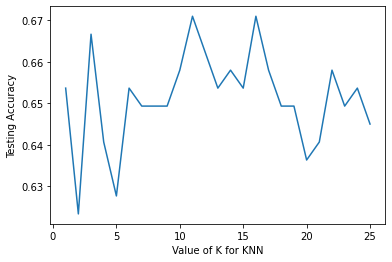

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

### **Bagging clasifier**


In [26]:
gaussian = clf2.fit(training, training_label)

In [27]:
training_pred = clf2.predict(training)
testing_pred = clf2.predict(test)



In [28]:
clf_training = accuracy_score(training_label, training_pred)
clf_test = accuracy_score(test_label, testing_pred)

print("Gaussian Training",clf_training)
print("Gaussian Testing",clf_test)

Gaussian Training 0.6293478260869565
Gaussian Testing 0.6363636363636364


In [29]:
from sklearn.ensemble import BaggingClassifier
n = list(range(2,500))
acuracy = []
for i in n:
  bag = BaggingClassifier(
          base_estimator=gaussian, # knn,gnb, jst
          n_estimators=i,
          random_state=0)
  bag = bag.fit(training, training_label)
  y_test_pred = bag.predict(test)
  bag_test = accuracy_score(test_label, y_test_pred)
  print(f'acuracy n = {i} = {bag_test}')
  acuracy.append(bag_test)

acuracy n = 2 = 0.6363636363636364
acuracy n = 3 = 0.6363636363636364
acuracy n = 4 = 0.6363636363636364
acuracy n = 5 = 0.6233766233766234
acuracy n = 6 = 0.6493506493506493
acuracy n = 7 = 0.6406926406926406
acuracy n = 8 = 0.6406926406926406
acuracy n = 9 = 0.6406926406926406
acuracy n = 10 = 0.6320346320346321
acuracy n = 11 = 0.6406926406926406
acuracy n = 12 = 0.6363636363636364
acuracy n = 13 = 0.6406926406926406
acuracy n = 14 = 0.6320346320346321
acuracy n = 15 = 0.6320346320346321
acuracy n = 16 = 0.6363636363636364
acuracy n = 17 = 0.6277056277056277
acuracy n = 18 = 0.6277056277056277
acuracy n = 19 = 0.6277056277056277
acuracy n = 20 = 0.6277056277056277
acuracy n = 21 = 0.6277056277056277
acuracy n = 22 = 0.6363636363636364
acuracy n = 23 = 0.6363636363636364
acuracy n = 24 = 0.6363636363636364
acuracy n = 25 = 0.6406926406926406
acuracy n = 26 = 0.6406926406926406
acuracy n = 27 = 0.6406926406926406
acuracy n = 28 = 0.6406926406926406
acuracy n = 29 = 0.6406926406926406


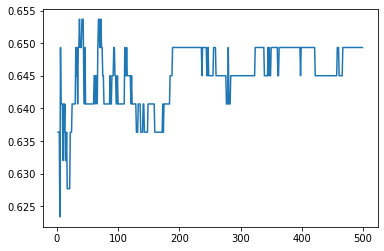

In [30]:
import matplotlib.pyplot as plt
# n = list(range(2,500))
plt.plot(n, acuracy)
plt.show()

In [31]:
max(acuracy)

0.6536796536796536

# **Random Forest**

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
clf = RandomForestClassifier(n_estimators=14, max_depth=2, random_state=0)

In [34]:
# bag = bag.fit(X_train, y_train)
clf = clf.fit(training, training_label)

In [35]:
n = list(range(2,500))
acuracy = []
for i in n:
  clf = RandomForestClassifier(n_estimators=i, max_depth=2, random_state=0)
  clf = clf.fit(training, training_label)
  y_test_pred = clf.predict(test)
  bag_test = accuracy_score(test_label, y_test_pred)
  print(f'acuracy n = {i} = {bag_test}')
  acuracy.append(bag_test)

acuracy n = 2 = 0.6623376623376623
acuracy n = 3 = 0.6536796536796536
acuracy n = 4 = 0.6536796536796536
acuracy n = 5 = 0.645021645021645
acuracy n = 6 = 0.6493506493506493
acuracy n = 7 = 0.645021645021645
acuracy n = 8 = 0.6493506493506493
acuracy n = 9 = 0.6493506493506493
acuracy n = 10 = 0.658008658008658
acuracy n = 11 = 0.6623376623376623
acuracy n = 12 = 0.6493506493506493
acuracy n = 13 = 0.6406926406926406
acuracy n = 14 = 0.658008658008658
acuracy n = 15 = 0.6666666666666666
acuracy n = 16 = 0.6493506493506493
acuracy n = 17 = 0.6536796536796536
acuracy n = 18 = 0.6493506493506493
acuracy n = 19 = 0.6406926406926406
acuracy n = 20 = 0.6406926406926406
acuracy n = 21 = 0.6406926406926406
acuracy n = 22 = 0.6493506493506493
acuracy n = 23 = 0.6406926406926406
acuracy n = 24 = 0.645021645021645
acuracy n = 25 = 0.6406926406926406
acuracy n = 26 = 0.6406926406926406
acuracy n = 27 = 0.6406926406926406
acuracy n = 28 = 0.6406926406926406
acuracy n = 29 = 0.645021645021645
acurac

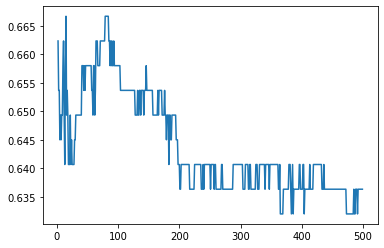

In [36]:
import matplotlib.pyplot as plt
# n = list(range(2,500))
plt.plot(n, acuracy)
plt.show()

In [37]:
max(acuracy)
# stacking

0.6666666666666666